In [2]:
# Import packages
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import scikitplot

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_auc_score
from sklearn import model_selection

np.random.seed(1)

In [3]:
## function to turn parameters for Random Forest
def RF_tune_parameter(X, y, metric, n_est, cv):
    print('Tuning...\nn varies from %d to %d'%(n_est[0], n_est[-1]))
    score = []
    for n in n_est:
        print('n =', n, end='\t')
        model = RandomForestClassifier(n_estimators = n, criterion='entropy')
        s = model_selection.cross_validate(model, X, y, scoring=metric, cv=cv)
        score.append(np.mean(s['test_score']))
        print('F1 score:', np.mean(s['test_score']))
    return np.array(score)

# Find out the n_estimators with the highest F1 score
def find_best_parameter(n_est, score, figure):
    print('n_est: ', n_est,'\nscore:', score)
    index = np.argmax(score)
    print('The best n_estimators :', n_est[index])
    return n_est[index]

In [4]:
# ========================== Training and testing set ============================================================
## vectorization CountVectorizer()
with open('train_data.pkl', 'rb') as f:
    X_tr, y_tr = pickle.load(f)

with open('test_data.pkl', 'rb') as f:
    X_te, y_te = pickle.load(f)

## vectorization TfidfVectorizer()
with open('train_data2.pkl', 'rb') as f:
    X_tr2, y_tr2 = pickle.load(f)

with open('test_data2.pkl', 'rb') as f:
    X_te2, y_te2 = pickle.load(f)

In [5]:
# ========================= Data set 1 ==============================================================================
print('CountVectorizer: Data set 1')

CountVectorizer: Data set 1


In [6]:
# ========================= Random Forest classier starts ===========================================================
n_est = np.arange(86, 94, 1)
S1 = RF_tune_parameter(X = X_tr, y = y_tr, metric = 'f1',n_est = n_est, cv = 5)
best_n_est1 = find_best_parameter(n_est, S1, 5)

classifier = RandomForestClassifier(n_estimators = best_n_est1, criterion='entropy')
classifier.fit(X_tr,y_tr)
y_pr_rt = classifier.fit(X_tr, y_tr).predict_proba(X_te)
y_pr = classifier.predict(X_te)

Tuning...
n varies from 86 to 93
n = 86	F1 score: 0.9830906049082762
n = 87	F1 score: 0.983212076912768
n = 88	F1 score: 0.9825993200248344
n = 89	F1 score: 0.9827369946028431
n = 90	F1 score: 0.9825030840749973
n = 91	F1 score: 0.9830759616288024
n = 92	F1 score: 0.9833232660219684
n = 93	F1 score: 0.9829730627517215
n_est:  [86 87 88 89 90 91 92 93] 
score: [0.9830906  0.98321208 0.98259932 0.98273699 0.98250308 0.98307596
 0.98332327 0.98297306]
The best n_estimators : 92


roc_auc for class 1: 0.9878345034595034


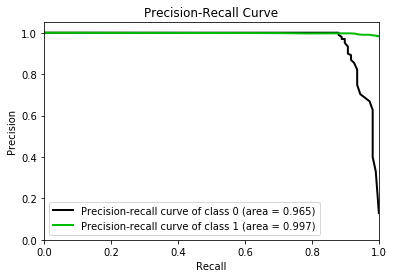

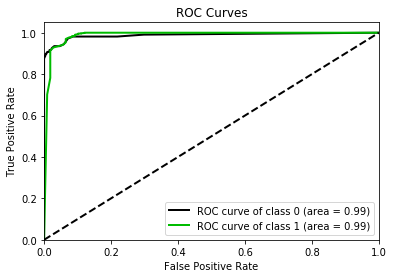

In [7]:
# ========================= precision_recall_curve plotting =========================================================
pr, rc, thresholds = precision_recall_curve(y_te, y_pr_rt[:, 1])
print("roc_auc for class 1:", roc_auc_score(y_te,y_pr_rt[:, 1]))
# Figure 1: precision, recall vs thresholds

scikitplot.metrics.plot_precision_recall(y_te, y_pr_rt, plot_micro = False)


# Figure 2: ROC
scikitplot.metrics.plot_roc(y_te, y_pr_rt, plot_micro = False, plot_macro = False)

In [8]:
# ========================== classification report and Confusion matrix ============================================
print(classification_report(y_te, y_pr))

m_confusion_test = confusion_matrix(y_te, y_pr)
print(pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1']))

print('\n')

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       108
           1       0.97      1.00      0.99       728

    accuracy                           0.98       836
   macro avg       0.99      0.91      0.95       836
weighted avg       0.98      0.98      0.98       836

          Predicted 0  Predicted 1
Actual 0           89           19
Actual 1            0          728




In [9]:
# ========================= Data set 2 ==============================================================================
print('TfidVectorizer: Data set 2')
# ========================= Random Forest classier starts ===========================================================
n_est = np.arange(59, 68, 1)
S2 = RF_tune_parameter(X = X_tr2, y = y_tr2, metric = 'f1',n_est = n_est, cv = 5)
best_n_est2 = find_best_parameter(n_est, S2, 6)
classifier2 = RandomForestClassifier(n_estimators = best_n_est2, criterion = 'entropy')
classifier2.fit(X_tr2,y_tr2)
y_pr_rt2 = classifier.fit(X_tr2, y_tr2).predict_proba(X_te2)
y_pr2 = classifier.predict(X_te2)

TfidVectorizer: Data set 2
Tuning...
n varies from 59 to 67
n = 59	F1 score: 0.9844993282000727
n = 60	F1 score: 0.9843844765819749
n = 61	F1 score: 0.9840331628261776
n = 62	F1 score: 0.9840360581187314
n = 63	F1 score: 0.9843860590133943
n = 64	F1 score: 0.984261018094106
n = 65	F1 score: 0.9842707826282572
n = 66	F1 score: 0.9831866198220395
n = 67	F1 score: 0.9830849989597648
n_est:  [59 60 61 62 63 64 65 66 67] 
score: [0.98449933 0.98438448 0.98403316 0.98403606 0.98438606 0.98426102
 0.98427078 0.98318662 0.983085  ]
The best n_estimators : 59


roc_auc for class 1: 0.9900666463166462


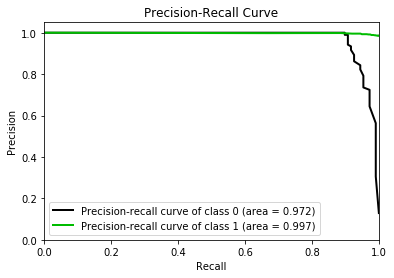

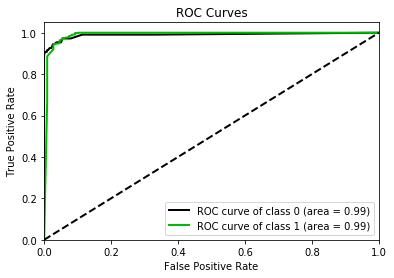

In [10]:
# ========================= precision_recall_curve plotting =========================================================
pr, rc, thresholds = precision_recall_curve(y_te2, y_pr_rt2[:, 1])
print("roc_auc for class 1:", roc_auc_score(y_te2,y_pr_rt2[:, 1]))
# Figure 1: precision, recall vs thresholds

scikitplot.metrics.plot_precision_recall(y_te2, y_pr_rt2, plot_micro = False)

# Figure 2: ROC
scikitplot.metrics.plot_roc(y_te2, y_pr_rt2, plot_micro = False, plot_macro = False)

In [11]:
# ========================== classification report and Confusion matrix ============================================
print(classification_report(y_te2, y_pr2))

m_confusion_test = confusion_matrix(y_te2, y_pr2)
print(pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1']))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       108
           1       0.98      1.00      0.99       728

    accuracy                           0.98       836
   macro avg       0.99      0.92      0.95       836
weighted avg       0.98      0.98      0.98       836

          Predicted 0  Predicted 1
Actual 0           90           18
Actual 1            0          728


In [12]:
# ==================================================================================================================
## store four models
with open('RF_model/RF_count.pkl', 'wb') as f:
    pickle.dump((classifier), f)

with open('RF_model/RF_tfid.pkl', 'wb') as f:
    pickle.dump((classifier2), f)

plt.show()